# Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))

from algorithms.optimistic_greedy import OptimisticGreedy

# Pilot run to tune optimistic-greedy

In [2]:
# bandit experiment parameters
num_arms = 10
num_steps = 1000
num_runs = 300

## a. Choosing Optimistic Initial value

In [3]:
# optimistic initial values
initial_values = [1.2, 2.0, 5.0, 7.0]

# performance of algorithm
terminal_average_reward = []

for initial_value in initial_values:

    terminal_average_reward_per_run = []

    # set seed to start
    np.random.seed(42)

    for run in range(num_runs):

        # create testbed using optimistic-greedy
        bandit = OptimisticGreedy(num_arms= num_arms, initial_value= initial_value)

        # run experiment to obtain terminal average reward
        terminal_avg_reward= bandit.run_experiment(num_steps= num_steps)

        terminal_average_reward_per_run.append(terminal_avg_reward)

        # change seed for next runs
        seed = np.random.randint(100000)
        np.random.seed(seed)

    # obtain the terminal average rewards for each initial values
    terminal_average_reward.append(terminal_average_reward_per_run)

## Average Reward

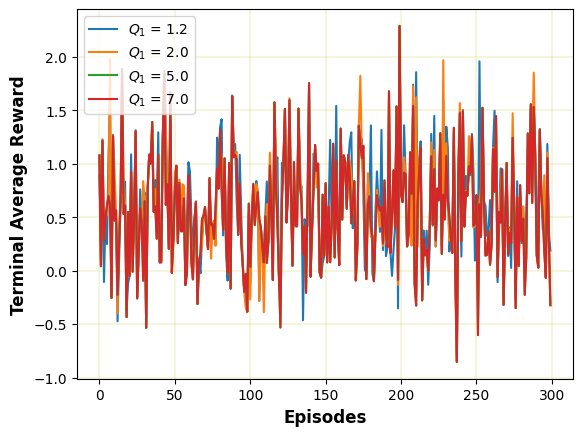

In [4]:
plt.plot(terminal_average_reward[0], label = '$Q_1$ = {}'.format(initial_values[0]))
plt.plot(terminal_average_reward[1], label = '$Q_1$ = {}'.format(initial_values[1]))
plt.plot(terminal_average_reward[2], label = '$Q_1$ = {}'.format(initial_values[2]))
plt.plot(terminal_average_reward[3], label = '$Q_1$ = {}'.format(initial_values[3]))
plt.legend()
plt.xlabel('Episodes', weight = 'bold', fontsize = 12)
plt.ylabel('Terminal Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

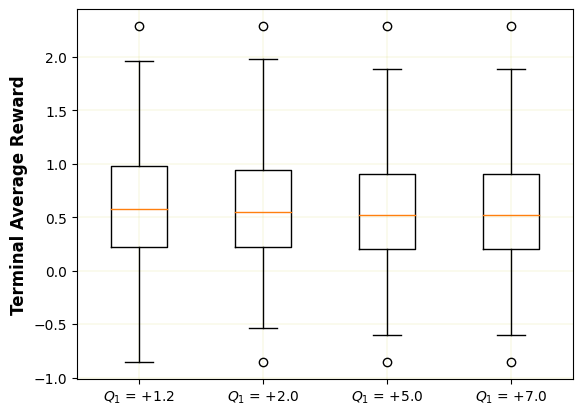

In [5]:
labels = ['$Q_1$ = +1.2',  '$Q_1$ = +2.0', '$Q_1$ = +5.0', '$Q_1$ = +7.0']

fig, ax = plt.subplots()

ax.set_ylabel('Terminal Average Reward', weight = 'bold', fontsize = 12)

ax.grid(color = 'y', linewidth = 0.1)

bplot = ax.boxplot(terminal_average_reward, patch_artist= False, labels= labels)

plt.show()

## b. Using Fixed Step Size (Q1 = +5)

In [6]:
alphas = [0.5, 0.2, 0.1, 0.05, 0.01]

initial_value = 5.0

terminal_average_reward_for_fixed = []

for alpha in alphas:
    
    terminal_average_reward_per_run = []

    # set starting seed
    np.random.seed(42)

    for run in range(num_runs):

        # create testbed 
        bandit = OptimisticGreedy(num_arms= num_arms, initial_value= initial_value, alpha= alpha)

        # run experiment to obtain terminal average reward
        terminal_avg_reward= optimal_action_per_step = bandit.run_experiment(num_steps= num_steps)

        terminal_average_reward_per_run.append(terminal_avg_reward)

        # change seed for next runs
        seed = np.random.randint(100000)
        np.random.seed(seed)

    # obtain the terminal average rewards for each step size
    terminal_average_reward_for_fixed.append(terminal_average_reward_per_run)


## Average Reward

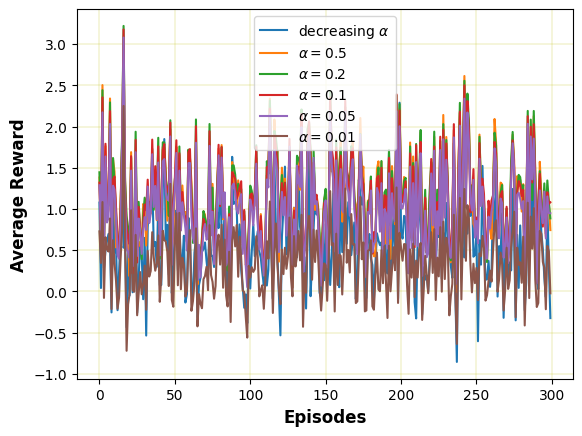

In [7]:
# the chosen initial value for decreasing step size, Q1= 0.1
plt.plot(terminal_average_reward[2], label = 'decreasing $\\alpha$')

# for fixed step size
plt.plot(terminal_average_reward_for_fixed[0], label = '$\\alpha = {}$'.format(alphas[0]))
plt.plot(terminal_average_reward_for_fixed[1], label = '$\\alpha = {}$'.format(alphas[1]))
plt.plot(terminal_average_reward_for_fixed[2], label = '$\\alpha = {}$'.format(alphas[2]))
plt.plot(terminal_average_reward_for_fixed[3], label = '$\\alpha = {}$'.format(alphas[3]))
plt.plot(terminal_average_reward_for_fixed[4], label = '$\\alpha = {}$'.format(alphas[4]))
plt.legend()
plt.xlabel('Episodes', weight = 'bold', fontsize = 12)
plt.ylabel('Average Reward', weight = 'bold', fontsize = 12)
plt.grid(color = 'y', linewidth = 0.2)

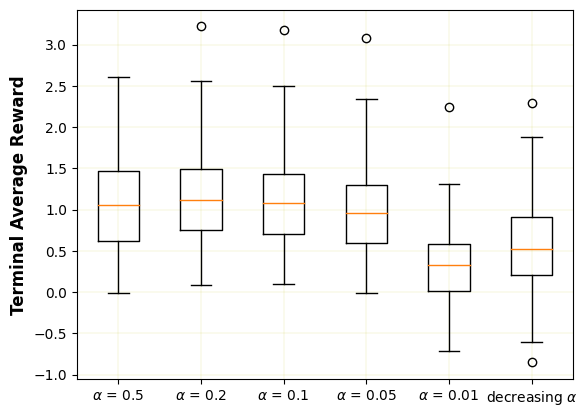

In [8]:
# append the selected decreasing alpha for comparison
terminal_average_reward_for_fixed.append(terminal_average_reward[2])

labels = ['$\\alpha$ = 0.5', '$\\alpha$ = 0.2', '$\\alpha$ = 0.1', '$\\alpha$ = 0.05', '$\\alpha$ = 0.01', 'decreasing $\\alpha$']

fig, ax = plt.subplots()

ax.set_ylabel('Terminal Average Reward', weight = 'bold', fontsize = 12)

ax.grid(color = 'y', linewidth = 0.1)

bplot = ax.boxplot(terminal_average_reward_for_fixed, patch_artist= False, labels= labels)

plt.show()